<a href="https://colab.research.google.com/github/Mathurshab2210/Data_sci_Python/blob/main/Price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Price predictor

In [2]:
import pandas as pd

In [3]:
housing=pd.read_csv('/content/data.csv')

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    int64  
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    int64  
 9   TAX         506 non-null    int64  
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd8c6d43d0>,
      dtype=object)

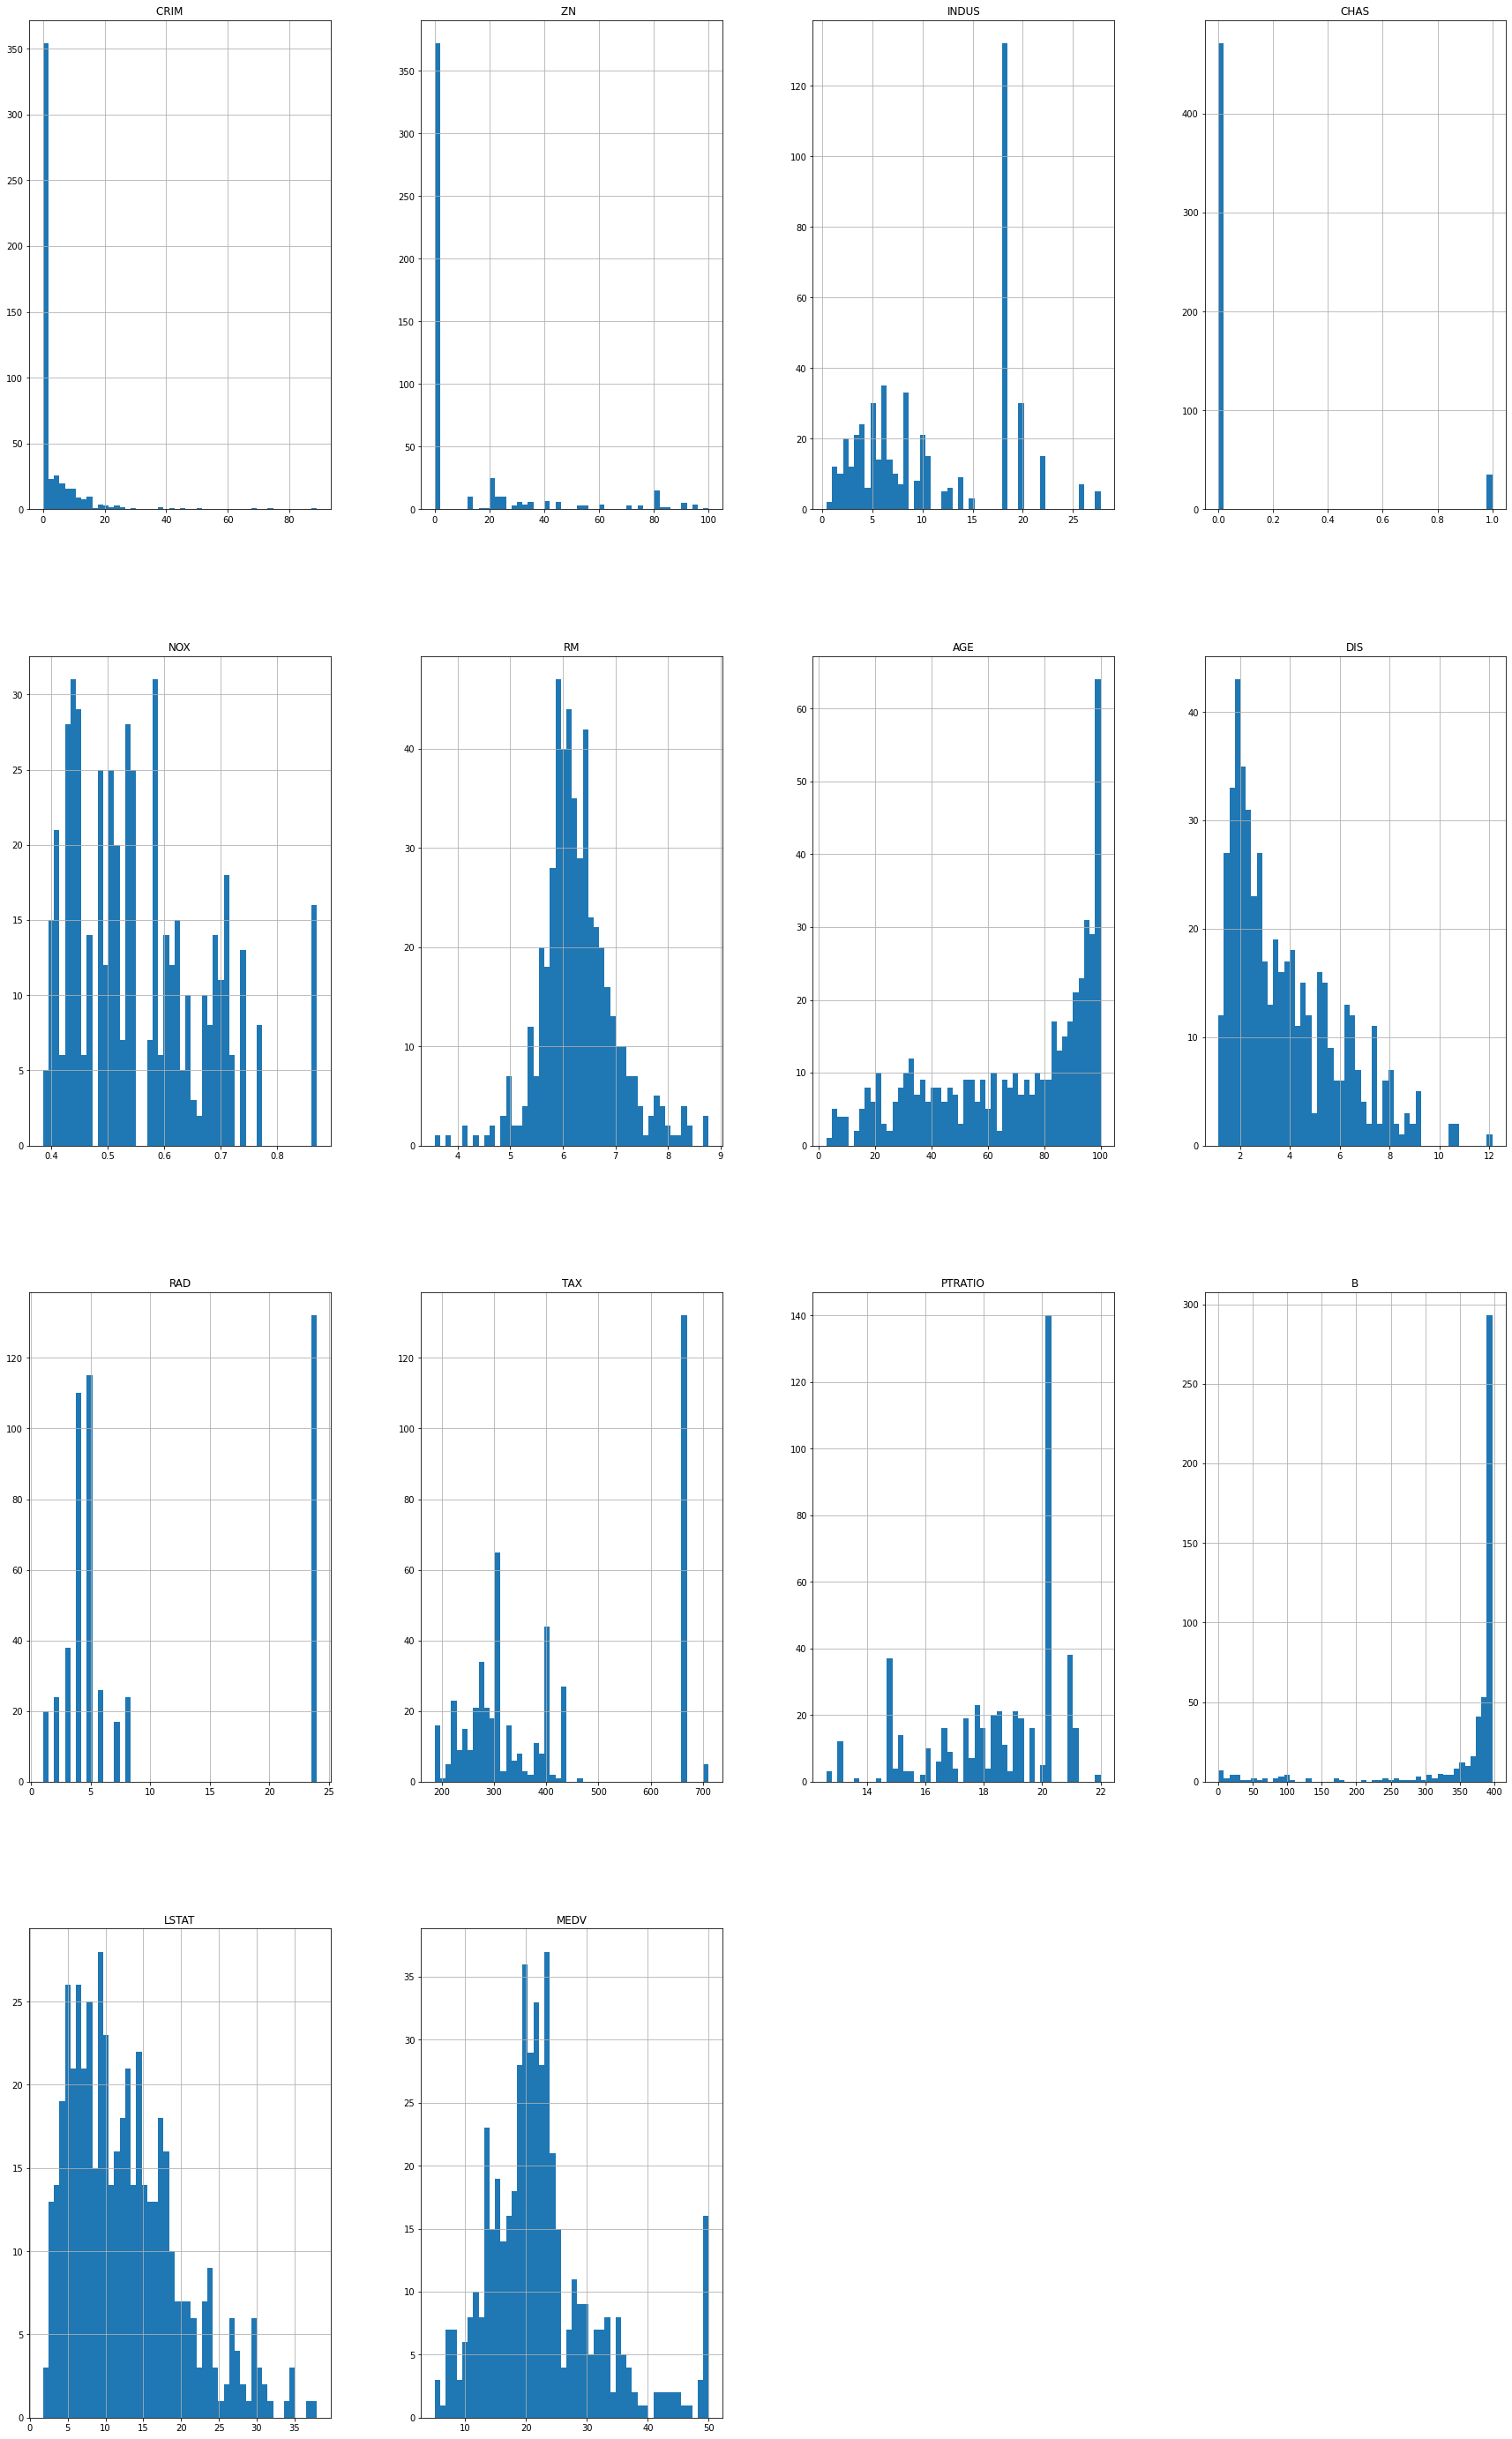

In [9]:
housing.hist(bins=50, figsize=(30,50))

In [10]:
##train test splitting
import numpy as np

# Train Test Split


In [11]:
# def split_train_test(data,test_ratio):
#   np.random.seed(43)
#   shuffled=np.random.permutation(len(data))
#   test_set_size=int(len(data)*test_ratio)
#   test_indices = shuffled[:test_set_size]
#   train_indices = shuffled[test_set_size:]
#   return data.iloc[train_indices], data.iloc[test_indices]


In [12]:
# train_set,test_set=split_train_test(housing,0.2)

In [13]:
# print(len(test_set))

In [14]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=43)

In [15]:
print(len(test_set))

102


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=43)
for train_index, test_index in split.split(housing,housing['CHAS']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

#for equal splittin of data

In [17]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

# Looking for correlations


In [18]:
corr_matrix=housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV          1.000000
RM            0.695360
ZN            0.360445
B             0.333461
DIS           0.249929
CHAS          0.175260
AGE          -0.376955
RAD          -0.381626
CRIM         -0.388305
NOX          -0.427321
TAX          -0.468536
INDUS        -0.483725
PTRATIO      -0.507787
LSTAT        -0.737663
Name: MEDV, dtype: float64

In [20]:
from pandas.plotting import scatter_matrix

In [21]:
attr=['MEDV','RM','B','LSTAT']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd7d8651d0>,
      dtype=object)

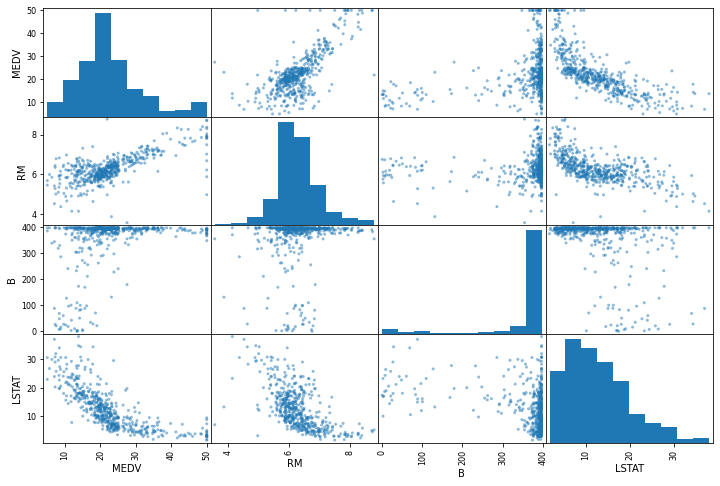

In [22]:
scatter_matrix(housing[attr],figsize=(12,8))

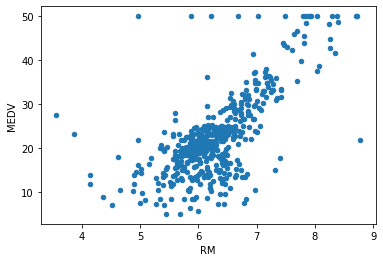

In [23]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=1)

In [126]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08
199,0.03150,95.0,1.47,0,0.403,6.975,15.3,7.6534,3,402,17.0,396.90,4.56
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21
299,0.05561,70.0,2.24,0,0.400,7.041,10.0,7.8278,5,358,14.8,371.58,4.74


In [127]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV          1.000000
RM            0.695360
ZN            0.360445
B             0.333461
DIS           0.249929
CHAS          0.175260
AGE          -0.376955
RAD          -0.381626
CRIM         -0.388305
NOX          -0.427321
TAX          -0.468536
INDUS        -0.483725
PTRATIO      -0.507787
LSTAT        -0.737663
Name: MEDV, dtype: float64

KeyError: ignored

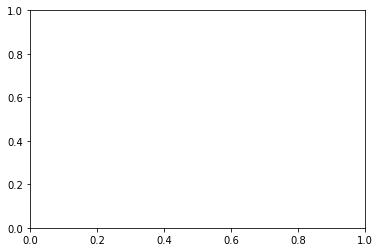

In [128]:
# housing.plot(kind='scatter',x='TAXRM',y='MEDV',alpha=1)

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [142]:
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
                      ('std_scaler',StandardScaler()),])

In [143]:
housing_tr=train_set
housing_num_tr=my_pipeline.fit_transform(housing_tr)

In [144]:
housing_num_tr

array([[ 4.52581407, -0.49169983,  1.06329337, ...,  0.43532361,
         2.69708355, -1.94842587],
       [-0.24210115, -0.49169983,  1.28254968, ...,  0.06741988,
        -0.7160898 ,  0.06827633],
       [-0.41398831,  0.04605526, -0.45224181, ...,  0.36307495,
         0.50794478, -0.10804736],
       ...,
       [-0.4215159 ,  2.94993276, -1.07890005, ...,  0.41590678,
        -0.44244745, -0.1962092 ],
       [-0.40445681, -0.49169983, -0.52483343, ...,  0.43532361,
        -0.74404251,  0.12337748],
       [-0.38205612, -0.49169983, -0.52483343, ...,  0.43532361,
        -0.90293162,  0.25562025]])

Selecting data model


In [145]:

housing = strat_train_set.drop('MEDV', axis=1)
housing_labels= strat_train_set['MEDV'].copy()

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(housing_tr,housing_labels)

RandomForestRegressor()

In [147]:
somedata=housing_tr.iloc[:5]
somelabels=housing_labels.iloc[:5]

In [148]:
prepdata=my_pipeline.transform(somedata)

In [149]:
model.predict(prepdata)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([35.673, 36.013, 33.448, 31.596, 32.13 ])

In [150]:
list(somelabels)

[33.3, 34.9, 21.5, 38.7, 29.0]

In [151]:
from sklearn.metrics import mean_squared_error
hspred=model.predict(housing_num_tr)
linmse=mean_squared_error(housing_labels,hspred)
lin_rmse=np.sqrt(linmse)
print(lin_rmse)

14.57989665796472


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [152]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring='neg_mean_squared_error', cv=10)
rmse_score=np.sqrt(-scores)

In [153]:
rmse_score

array([ 9.4616073 , 10.86223159,  9.75988074, 10.11618113, 10.19672307,
       10.63891608, 11.27144453,  9.48505518,  9.24363896, 10.34661998])

In [154]:
def print_scores(scores):
  print("scores:", scores)
  print("Mean:", scores.mean())
  print("std deviation:", scores.std())


In [155]:
print_scores(rmse_score)

scores: [ 9.4616073  10.86223159  9.75988074 10.11618113 10.19672307 10.63891608
 11.27144453  9.48505518  9.24363896 10.34661998]
Mean: 10.138229855813117
std deviation: 0.6272376676150523


In [156]:
from joblib import dump,load

In [157]:
dump(model,'price-predictor.joblib')

['price-predictor.joblib']

In [159]:
X_test=strat_test_set
Y_test=strat_test_set['MEDV'].copy()
X_test_prer=my_pipeline.transform(X_test)
finalpred=model.predict(X_test)
finalmse=mean_squared_error(Y_test,finalpred)
firmse=np.sqrt(finalmse)
firmse

11.34254664362219

In [160]:
print(list(finalpred))
print('test')
print(list(Y_test))

[29.366999999999962, 22.811999999999998, 27.21199999999998, 23.939, 21.35200000000003, 21.926, 20.791999999999998, 27.32700000000003, 22.753000000000025, 20.13599999999998, 23.230999999999973, 26.720999999999993, 19.417000000000016, 23.622000000000007, 29.890999999999973, 15.472000000000005, 38.10799999999999, 14.870999999999983, 18.386000000000003, 20.189999999999973, 23.18799999999996, 15.658000000000014, 28.188999999999965, 16.715999999999998, 20.220000000000024, 17.240999999999985, 16.018999999999984, 32.81899999999997, 22.824999999999996, 21.39399999999999, 22.95500000000002, 17.35300000000001, 24.35799999999998, 24.06700000000001, 19.976000000000003, 31.250999999999966, 25.173999999999978, 22.412999999999982, 37.97500000000001, 18.74800000000002, 18.931000000000026, 20.043000000000003, 41.229, 12.165000000000003, 29.079999999999995, 21.36299999999998, 24.20299999999999, 20.767000000000003, 23.89199999999999, 23.051, 30.445, 12.948000000000006, 12.255999999999998, 31.3730000000000

In [161]:
model=load('/content/price-predictor.joblib')

In [163]:
prepdata[0]

array([ 4.52581407, -0.49169983,  1.06329337, -0.26761547,  1.24746018,
       -1.19183179,  1.12946465, -1.13887896,  1.68801285,  1.55201972,
        0.81464999,  0.43532361,  2.69708355, -1.94842587])

In [174]:
input=np.array([[ -4.52581407, -0.49169983,  1.06329337, -0.26761547,  1.24746018,
       -40.183179,  1.12946465, -1.13887896,  1.68801285,  1.55201972,
        0.81464999,  8.43532361,  2.69708355, -1.94842587]])

In [175]:
model.predict(input)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([36.269])